# Welcome to Intro to Data Analysis

## In this guide we will walk through a basic example of how to:
* gather data
* analyze data
* vizualize data

In [1]:
# Let's start by importing the pandas library
# Pandas make tabular data analysis (think spreadsheets) easy
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Let's use Pandas to read in a dataset of of Titanic Survivors

In [2]:
# Read the excel file in the data folder into a pandas dataframe
df = pd.read_excel("data/titanic3.xls")

In [3]:
# Display the first five rows of the dataframe
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Python makes it easy to compare different variables
## One way to do that is with a scatter plot
### Let's compare ticket price and passenger class, e.g., 1st, 2nd, 3rd

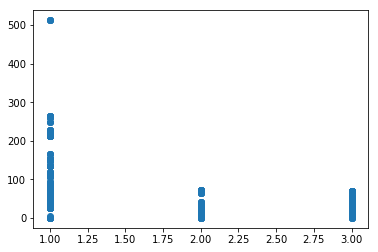

In [4]:
plt.scatter(df.pclass, df.fare)

### Interesting! It looks like some 3rd class passengers paid more for their tickets than some 1st class passengers

## Now let's turn our attention to analyzing the likelihood of survival

In [5]:
# Let's pivot our data by sex and passenger class
df_pt = df.pivot_table(values='survived', index=['sex', 'pclass'], 
                            aggfunc=('mean','count'))
df_pt

count      mean
sex    pclass                 
female 1         144  0.965278
       2         106  0.886792
       3         216  0.490741
male   1         179  0.340782
       2         171  0.146199
       3         493  0.152130

## The closer the *mean* is to 1 the higher likelihood each group survived

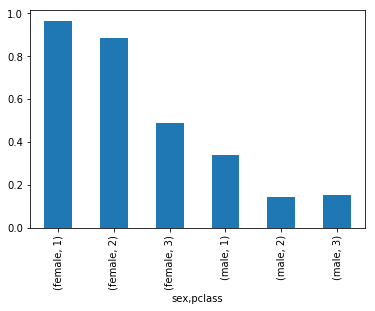

In [6]:
df_pt['mean'].plot.bar()

## We can see here that females on average were more likely to survive than maen
#### And that females in 1st and 2nd class were the most likely to survive above all others

# Question
## Do you think age played a role in survival?

In [7]:
# Let's take a look at our ages
# It might be easier to bucket the ages into categories of "Adult" or "Minor"
df['age'].head()

0    29.0000
1     0.9167
2     2.0000
3    30.0000
4    25.0000
Name: age, dtype: float64

## Each age is a number, but it might be easier if we just classifed each person as "Adult" or "Minor"

In [8]:
# Let's use a Lambda function to check label each record as Adult or Minor
df['age_bucket'] = df['age'].apply(lambda x: 'Minor' if x < 18 else 'Adult')
df[['age_bucket', 'age', 'name']].head()

,age_bucket,age,name
0,Adult,29.0000,"Allen, Miss. Elisabeth Walton"
1,Minor,0.9167,"Allison, Master. Hudson Trevor"
2,Minor,2.0000,"Allison, Miss. Helen Loraine"
3,Adult,30.0000,"Allison, Mr. Hudson Joshua Creighton"
4,Adult,25.0000,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"


## Now let's update our Pivot Table

In [9]:
df_pt = df.pivot_table(values='survived', index=['sex', 'pclass', 'age_bucket'], 
                            aggfunc=('mean','count'))
df_pt

count      mean
sex    pclass age_bucket                 
female 1      Adult         136  0.970588
              Minor           8  0.875000
       2      Adult          88  0.863636
              Minor          18  1.000000
       3      Adult         170  0.476471
              Minor          46  0.543478
male   1      Adult         172  0.319767
              Minor           7  0.857143
       2      Adult         156  0.089744
              Minor          15  0.733333
       3      Adult         433  0.140878
              Minor          60  0.233333

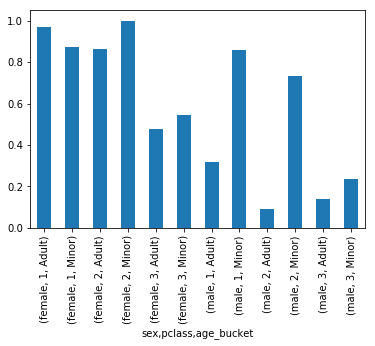

In [10]:
df_pt['mean'].plot.bar()

## Let's sort our data by highest probability of survival

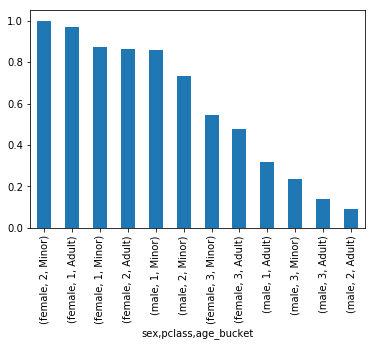

In [11]:
df_pt['mean'].sort_values(ascending=False).plot.bar()

## That's better!
#### Now we have the likelihood of survival sorted from highest probablity to lowest